# Read files

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [3]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
root      = '/kaggle/input'
main_root = os.listdir(root)
main_root

['rsna-2023-abdominal-trauma-detection']

In [5]:
new_root  = os.path.join(root, main_root[0])
main_tree = os.listdir(new_root)
main_tree

['train_dicom_tags.parquet',
 'sample_submission.csv',
 'train_series_meta.csv',
 'train_images',
 'test_dicom_tags.parquet',
 'segmentations',
 'train.csv',
 'test_series_meta.csv',
 'image_level_labels.csv',
 'test_images']

In [6]:
main_files = [f for f in main_tree if len(f.split('.')) > 1]
main_files

['train_dicom_tags.parquet',
 'sample_submission.csv',
 'train_series_meta.csv',
 'test_dicom_tags.parquet',
 'train.csv',
 'test_series_meta.csv',
 'image_level_labels.csv']

In [7]:
main_folders = [f for f in main_tree if f not in main_files]
main_folders

['train_images', 'segmentations', 'test_images']

In [46]:
f_name     = os.path.join(new_root, main_files[-3])
print(f_name)
train_file = pd.read_csv(f_name)
train_file

/kaggle/input/rsna-2023-abdominal-trauma-detection/train.csv


,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,9951,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3143,9960,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3144,9961,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3145,9980,1,0,1,0,1,0,0,1,0,0,0,0,1,1


In [9]:
# Notes
# Each row is for unique patient
# Patient id is not organised in order

# bowel - good/bad
# extra... - good/bad
# kidney - healthy/low/high
# liver - healthy/low/high
# bowel - healthy/low/high

In [10]:
f_name     = os.path.join(new_root, main_files[2])
print(f_name)
train_meta = pd.read_csv(f_name)
train_meta

/kaggle/input/rsna-2023-abdominal-trauma-detection/train_series_meta.csv


,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0
...,...,...,...,...
4706,9961,2003,381.00,0
4707,9961,63032,143.75,0
4708,9980,40214,103.00,0
4709,9980,40466,135.00,0


In [47]:
f_name       = os.path.join(new_root, main_files[-2])
print(f_name)
test_meta    = pd.read_csv(f_name)
test_meta

/kaggle/input/rsna-2023-abdominal-trauma-detection/test_series_meta.csv


,patient_id,series_id,aortic_hu
0,48843,295,401.25
1,48843,62825,238.00
2,50046,24574,149.00
3,50046,60658,352.00
4,63706,39279,219.00
5,63706,41385,319.00


In [32]:
f_name       = os.path.join(new_root, main_files[-1])
print(f_name)
print("Only provided for certain cases of bowels and extravasation [internal bleeding]")
image_labels = pd.read_csv(f_name)
image_labels

/kaggle/input/rsna-2023-abdominal-trauma-detection/image_level_labels.csv
Only provided for certain cases of bowels and extravasation [internal bleeding]


,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation
...,...,...,...,...
12024,9632,3750,155,Active_Extravasation
12025,9632,3750,156,Active_Extravasation
12026,9632,3750,157,Active_Extravasation
12027,9632,3750,158,Active_Extravasation


In [30]:
f_name             = os.path.join(new_root, main_files[1])
print(f_name)
sample_submisstion = pd.read_csv(f_name)
sample_submisstion

/kaggle/input/rsna-2023-abdominal-trauma-detection/sample_submission.csv


,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high
0,48843,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,50046,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,63706,0.5,0.5,0.5,0.5,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


In [48]:
# Let's save some memory
del train_file
del train_meta
del image_labels
del test_meta

Read Image Data

In [15]:
train_images_path = os.path.join(new_root, 'train_images')
print(train_images_path)
len(os.listdir(train_images_path))

/kaggle/input/rsna-2023-abdominal-trauma-detection/train_images


3147

In [33]:
# counting number of unique patients
n = len(pd.unique(train_file['patient_id']))
  
print("No. of.unique patients :", n)

No. of.unique patients : 3147


In [22]:
# train_images
# |
# |_ patient ID
#     |_ scan I
#         |_ many images
#     |
#     |_ scan II (optional)
#         |_ many images

In [16]:
test_images_path = os.path.join(new_root, 'test_images')
print(test_images_path)
len(os.listdir(test_images_path))

/kaggle/input/rsna-2023-abdominal-trauma-detection/test_images


3

Segmentation of organs, only for certain images

In [40]:
segs_path = os.path.join(new_root, 'segmentations')
print(segs_path)
n = len(os.listdir(segs_path))
print("No. of available segmentations (nii files) = ", n)

/kaggle/input/rsna-2023-abdominal-trauma-detection/segmentations
No. of available segmentations (nii files) =  206


In [34]:
import pydicom
from matplotlib import pyplot as plt

def standardize_pixel_array(dcm: pydicom.dataset.FileDataset) -> np.ndarray:
    # Correct DICOM pixel_array if PixelRepresentation == 1.
    pixel_array = dcm.pixel_array
    if dcm.PixelRepresentation == 1:
        bit_shift = dcm.BitsAllocated - dcm.BitsStored
        dtype = pixel_array.dtype 
        pixel_array = (pixel_array << bit_shift).astype(dtype) >>  bit_shift
    return pixel_array

train_dicom_tags = pd.read_parquet('/kaggle/input/rsna-2023-abdominal-trauma-detection/train_dicom_tags.parquet', engine='pyarrow')

Below is a fix given by hosts for some error in dycom files

1.2.123.12345.1.2.3.5425.1.62: Pixel Representation = 1
Two images are equal: False


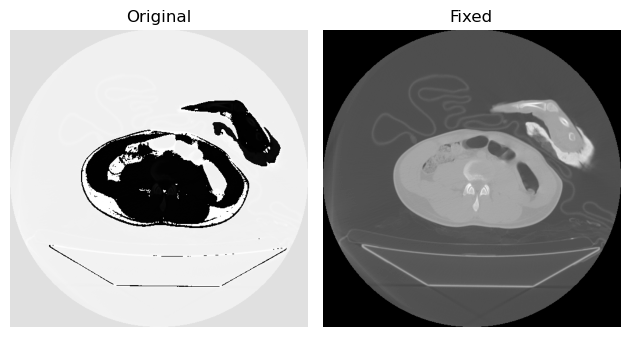

In [35]:
# Grab the path of the image in index 917637
sample_image = train_dicom_tags.loc[917637]['path']

# Open the DICOM file using pydicom.
dcm = pydicom.read_file(os.path.join('/kaggle/input/rsna-2023-abdominal-trauma-detection',sample_image))

original_pixel_array = dcm.pixel_array
fixed_pixel_array = standardize_pixel_array(dcm)

# To demonstrate that Pixel Repsentation is indeed 1
print(f'{dcm.SOPInstanceUID}: Pixel Representation = {dcm.PixelRepresentation}')
# To demonstrate whether the pixel array has been changed after passing through the function.
print(f'Two images are equal: {np.array_equal(original_pixel_array,fixed_pixel_array)}')

# plot both images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(original_pixel_array, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')
ax2.imshow(fixed_pixel_array, cmap='gray')
ax2.set_title('Fixed')
ax2.axis('off')
fig.tight_layout()

(512, 512, 483)


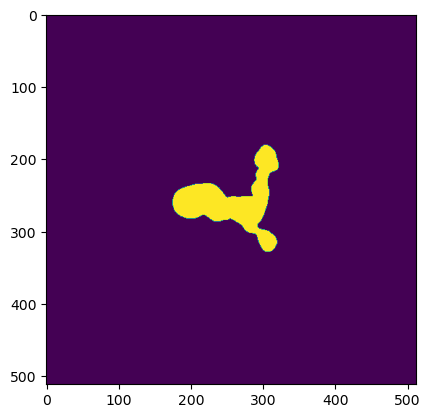

In [50]:
import nibabel as nib
import shutil

# Copy a random label file to /kaggle/working directory (without .nii file extension)
src = '/kaggle/input/rsna-2023-abdominal-trauma-detection/segmentations/10000.nii'
dst = '/kaggle/working/1000.nii'

shutil.copyfile(src, dst);

# Check the shape
img = nib.load(dst).get_fdata()
print(img.shape)

# Plot a single frame from the middle of the stack
plt.imshow(img[:,:,150])
plt.show()
